# Hierarchical Clustering

<img src="img/intro.png" width="600" height="400">

They are two types of Hierarchical clustering: __agglomerative (bottom up) and divisive (reverse of agglomerative)__.

## Agglomerative HC

<img src="img/steps.png" width="800" height="600">

### Closest clusters

How do we measure de distance between two clusters ?

Based on the problem, you can have different options, so you will need to choose one:

<img src="img/distance_clusters.png" width="600" height="400">

### Detailed Steps

<img src="img/step1.png" width="600" height="400">

<img src="img/step2.png" width="600" height="400">

<img src="img/step3.png" width="600" height="400">

<img src="img/step4.png" width="600" height="400">

<img src="img/final_step.png" width="600" height="400">

Every steps are memorized in a Dendrogram.

### Dendrograms

Imagine we are in step 2 of our HC algo. We will plot in the dendrogram the euclidean distance between the points and link them.

<img src="img/dendo_step1.png" width="600" height="400">

Then for step 3 with the next closest points.

<img src="img/dendo_step2.png" width="600" height="400">

<img src="img/dendo_step3.png" width="600" height="400">

<img src="img/dendo_step4.png" width="600" height="400">

<img src="img/dendo_final_step.png" width="600" height="400">

This dendrogram is giving you the order of how the different clusters were built.

### Use Dendrograms for HC

If we use threshold at a specific value of the euclidean distance, we can know at how many clusters the algo should stop. We just need to see in the dendrogram how many vertical lines our threshold is crossing.

<img src="img/hc_dendro_1.png" width="600" height="400">

If we decrease the value of the threshold.

<img src="img/hc_dendro_2.png" width="600" height="400">

If we decrease the value of the threshold below our first euclidean distance.

<img src="img/hc_dendro_3.png" width="600" height="400">

__How can we find the optimal number of clusters ?__

We have to find the longest vertical line which doesn't cross horizontal lines.
Find the largest distance i can make without crossing horizontal line.

<img src="img/largest_distance.png" width="600" height="400">

__Other Example__:

<img src="img/example_dendro.png" width="600" height="400">


Now, Lets start with a practical example

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In this dataset contains informations of clients of a mall. 

So as a reminder of the spending score is a score that the amount computed for each of their clients based on several criteria including for example their income the number of times per week they show up in the mall.

The goal of our study is to segment clients based on the annual income and spending score.

Let's build a array with only these two columns.

In [2]:
X = dataset.iloc[:, [3, 4]].values

X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Now we are going to build our dendrogram to find the optimal number of clusters.

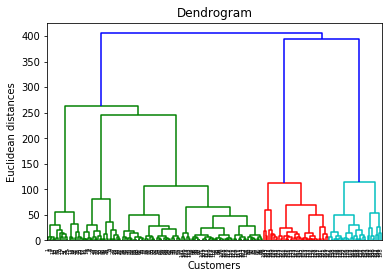

In [3]:
# Using the dendrogram to find the optimal number of clusters - Ward minimize the clusters variances
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The Optimal number of cluster is __5__

<img src="img/pratical_dendro.png" width="600" height="400">


In [5]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

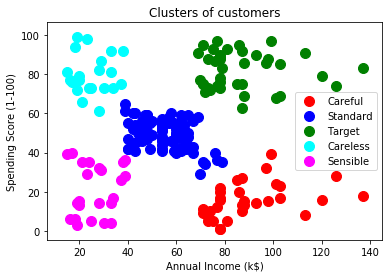

In [8]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()